# XOR using Keras#

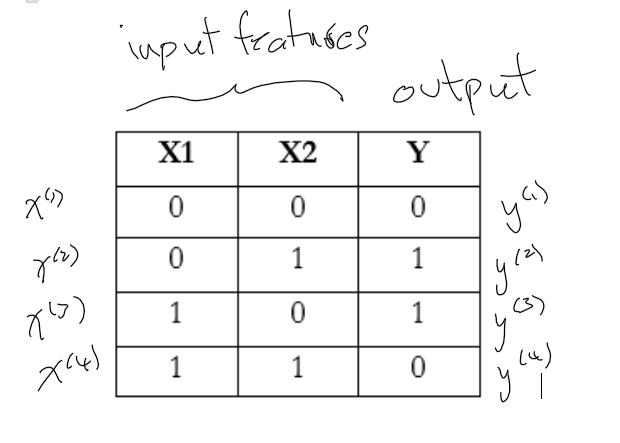

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, cv2, itertools

In [2]:
from keras.layers import Input, Dense, Dropout
from keras.models import Sequential, Model
import keras
import tensorflow as tf # add this if get attribute error

Using TensorFlow backend.


In [6]:
train_set = np.load('/Users/juwanenglish/CPE 4903 - NN/Cs_and_Ds/train.npz')
test_set = np.load('/Users/juwanenglish/CPE 4903 - NN/Cs_and_Ds/test.npz')


In [7]:
X_train = train_set['X']
Y_train = train_set['Y']
X_test = test_set['X']
Y_test = test_set['Y']

X_train = X_train/255
X_test = X_test/255
Y_train = Y_train
Y_test = Y_test

In [8]:
print('Shape of X_train is {}', format(X_train.shape))
print('Shape of X_test is {}', format(X_test.shape))
print('Shape of Y_train is {}', format(Y_train.shape))
print('Shape of Y_test is {}', format(Y_test.shape))

Shape of X_train is {} (20000, 12288)
Shape of X_test is {} (5000, 12288)
Shape of Y_train is {} (20000, 1)
Shape of Y_test is {} (5000, 1)


In [9]:
def sigmoid(Z):
    a = 1/(1+np.exp(-z))
    return a

In [10]:
ROWS = 64
COLS = 64
CHANNELS = 3
def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR)
    return cv2.resize(img, (ROWS, COLS),interpolation=cv2.INTER_CUBIC)

In [11]:
nx = X_train.shape[1]
X_train.shape

(20000, 12288)

In [12]:
nx

12288

## Keras ##

In [14]:
model = Sequential()
model.add(Dense(units=400,activation='relu',input_dim=nx))
model.add(Dropout(0.2)) # to prevent overtraining
model.add(Dense(units=300,activation='relu')) # add additional layer
model.add(Dropout(0.2)) # to prevent overtraining
model.add(Dense(units=200,activation='relu')) # add additional layer
model.add(Dropout(0.2)) # to prevent overtraining
model.add(Dense(units=1,activation='sigmoid'))

#sgd=tf.keras.optimizers.SGD(learning_rate=.1)  # add tf in front
opt = keras.optimizers.Adam()
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

print(model.summary())

history = model.fit(X_train,Y_train,epochs=10,batch_size=400,validation_split=.2,verbose=1)


2022-11-01 11:35:16.897214: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-01 11:35:16.903413: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 4. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 400)               4915600   
_________________________________________________________________
dropout_1 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 300)               120300    
_________________________________________________________________
dropout_2 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               60200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

In [15]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


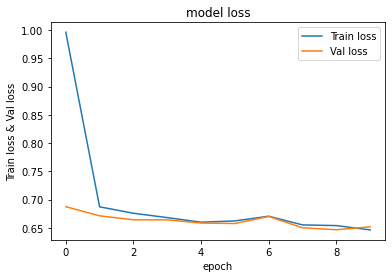

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Train loss & Val loss')
plt.xlabel('epoch')
plt.legend(['Train loss','Val loss'], loc ='upper right')
plt.show()

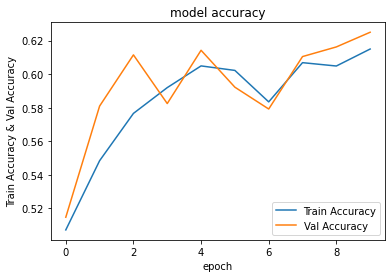

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Train Accuracy & Val Accuracy')
plt.xlabel('epoch')
plt.legend(['Train Accuracy','Val Accuracy'], loc ='lower right')
plt.show()

In [21]:
# Evaluate a different way
print('Evaluate on train data')
Yhat = model.predict(X_train)
acc = np.mean(np.rint(Yhat) == Y_train)
print('The train accuracy is:', acc*100)

Evaluate on train data
The train accuracy is: 63.705


In [23]:
# Evaluate a different way
print('Evaluate on test data')
Yhat = model.predict(X_test)
acc = np.mean(np.rint(Yhat) == Y_test)
print('The test accuracy is:', acc*100)

Evaluate on test data
The test accuracy is: 60.46


In [24]:
TEST_DIR = r'/Users/juwanenglish/CPE 4903 - NN/Cs_and_Ds/test'
test_images = [TEST_DIR+'/'+i for i in os.listdir(TEST_DIR)]
test_images[0]

'/Users/juwanenglish/CPE 4903 - NN/Cs_and_Ds/test/9733.jpg'

File path /Users/juwanenglish/CPE 4903 - NN/Cs_and_Ds/test/9069.jpg
Prediction: CAT with probability [[57.333225]]%


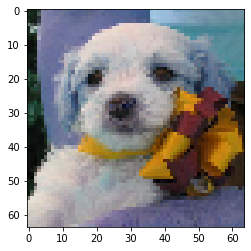

File path /Users/juwanenglish/CPE 4903 - NN/Cs_and_Ds/test/5653.jpg
Prediction: DOG with probability [[56.375034]]%


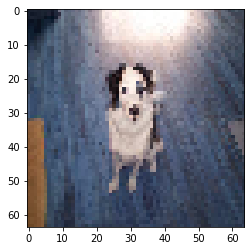

File path /Users/juwanenglish/CPE 4903 - NN/Cs_and_Ds/test/3222.jpg
Prediction: DOG with probability [[52.607285]]%


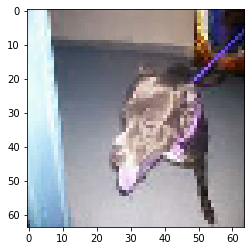

File path /Users/juwanenglish/CPE 4903 - NN/Cs_and_Ds/test/11765.jpg
Prediction: CAT with probability [[52.080704]]%


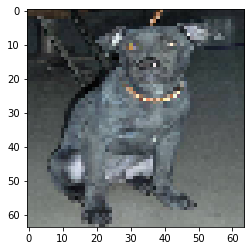

File path /Users/juwanenglish/CPE 4903 - NN/Cs_and_Ds/test/5647.jpg
Prediction: CAT with probability [[73.94395]]%


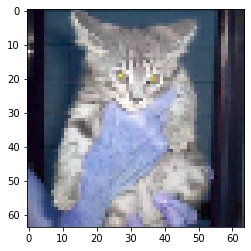

File path /Users/juwanenglish/CPE 4903 - NN/Cs_and_Ds/test/2128.jpg
Prediction: CAT with probability [[59.24885]]%


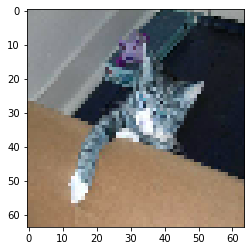

File path /Users/juwanenglish/CPE 4903 - NN/Cs_and_Ds/test/3236.jpg
Prediction: DOG with probability [[56.375034]]%


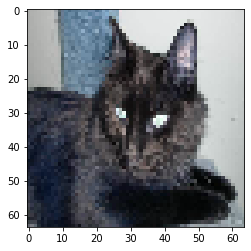

File path /Users/juwanenglish/CPE 4903 - NN/Cs_and_Ds/test/11771.jpg
Prediction: CAT with probability [[52.271526]]%


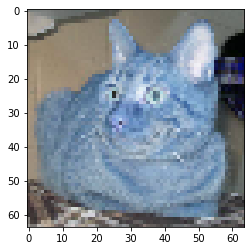

In [26]:
for i in range(45, 53):
    file = test_images[i]
    print('File path',test_images[i])
    test_image = read_image(file)
    X_img = test_image.reshape(1, ROWS*COLS*CHANNELS)/255
    A = model.predict(X_img)
    if A>.5:
        print('Prediction: CAT with probability {}%'. format(A*100))
    else:
        print('Prediction: DOG with probability {}%'. format(100-A*100))
    plt.imshow(test_image);
    plt.show()
